# Predicting Wine Quality

<img src="https://chateauberne-vin.com/cdn/shop/articles/qualite_du_vin.jpg?v=1680625453" width="600">

In this project, the goal is to predict the quality of wine (an ordinal integer) based on precise physicochemical features. The dataset is from a "Kaggle competition," and the task is an "**ordinal regression**" problem. The target variable is "**quality**" (an ordinal integer).

## Features

* `fixed acidity`: (numeric).
* `volatile acidity`: (numeric).
* `citric acid`: (numeric).
* `residual sugar`: (numeric).
* `chlorides`: (numeric).
* `free sulfur dioxide`: (numeric).
* `total sulfur dioxide`: (numeric).
* `density`: (numeric).
* `pH`: (numeric).
* `sulphates`: (numeric).
* `alcohol`: (numeric).
* `quality`: (Target) Wine quality (ordinal, integer).

The dataset was taken from Kaggle.

[Kaggle | Predicting Wine Quality](https://www.kaggle.com/competitions/wine-quality-ordinal/overview)

## Data Read

In [3]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [6]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis 

In [7]:
train.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.9,0.725,0.00,2.4,0.093,14.0,31.0,0.99640,3.48,0.54,9.8,5.0
1,1,7.2,0.610,0.06,1.6,0.084,6.0,14.0,0.99765,3.53,0.75,10.9,7.0
2,2,9.3,0.310,0.34,2.7,0.084,32.0,71.0,0.99760,3.25,0.87,9.3,7.0
3,3,6.4,0.440,0.09,2.5,0.082,4.0,12.0,0.99498,3.32,0.84,9.8,6.0
4,4,7.8,0.540,0.00,1.8,0.080,15.0,37.0,0.99720,3.52,0.56,9.8,5.0


In [9]:
train.shape

(15000, 13)

In [10]:
train.isnull().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
train.duplicated().sum()

0

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   fixed acidity         15000 non-null  float64
 2   volatile acidity      15000 non-null  float64
 3   citric acid           15000 non-null  float64
 4   residual sugar        15000 non-null  float64
 5   chlorides             15000 non-null  float64
 6   free sulfur dioxide   15000 non-null  float64
 7   total sulfur dioxide  15000 non-null  float64
 8   density               15000 non-null  float64
 9   pH                    15000 non-null  float64
 10  sulphates             15000 non-null  float64
 11  alcohol               15000 non-null  float64
 12  quality               15000 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


In [13]:
train.drop(columns='id').describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,15000.0,8.150407,1.389280,3.50000,7.20000,7.8000,8.9000,15.80000
volatile acidity,15000.0,0.506026,0.135077,0.18000,0.40000,0.5100,0.6000,1.74000
citric acid,15000.0,0.229651,0.178647,0.00000,0.05000,0.2400,0.3700,0.77000
residual sugar,15000.0,2.185944,0.521511,1.10000,1.90000,2.1000,2.3000,13.30000
chlorides,15000.0,0.078890,0.014986,0.01200,0.07300,0.0780,0.0840,0.41500
free sulfur dioxide,15000.0,13.041077,7.843052,0.65000,6.00000,11.0000,17.0000,52.00000
total sulfur dioxide,15000.0,36.893967,23.956718,5.00000,19.00000,29.0000,48.0000,152.00000
density,15000.0,0.996907,0.001392,0.99064,0.99588,0.9968,0.9978,1.00369
pH,15000.0,3.323941,0.116201,2.79000,3.24000,3.3200,3.3900,4.01000
sulphates,15000.0,0.618216,0.107910,0.40000,0.55000,0.5900,0.6600,1.95000


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
train["quality"].unique()

array([5., 7., 6., 4., 8., 3.])

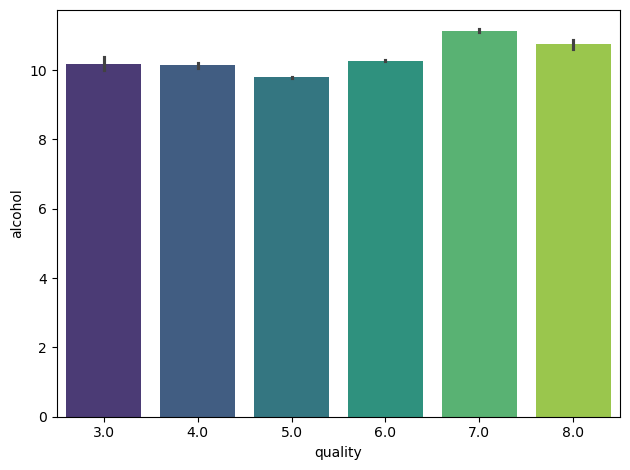

In [18]:
sns.barplot(train, x='quality', y='alcohol', palette='viridis')
plt.tight_layout()

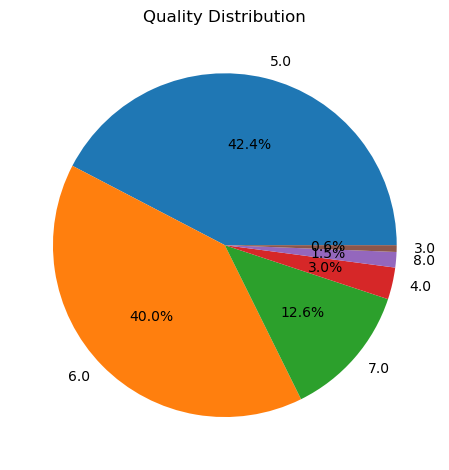

In [19]:
train.quality.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Quality Distribution')
plt.ylabel('')
plt.tight_layout()

In [20]:
features = train.drop(columns=['id', 'quality']).columns

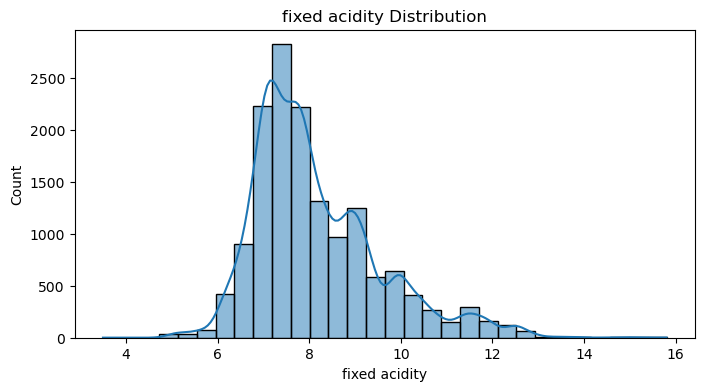

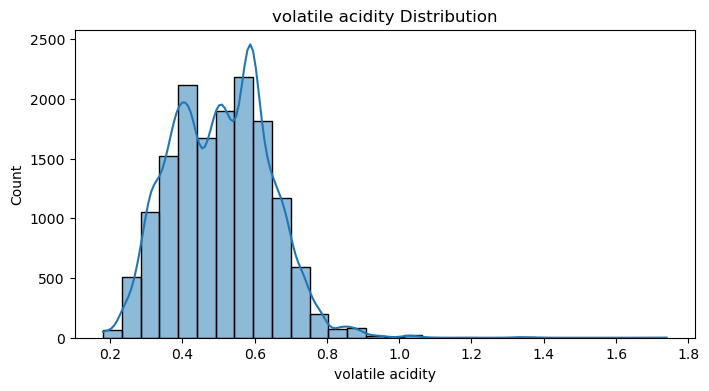

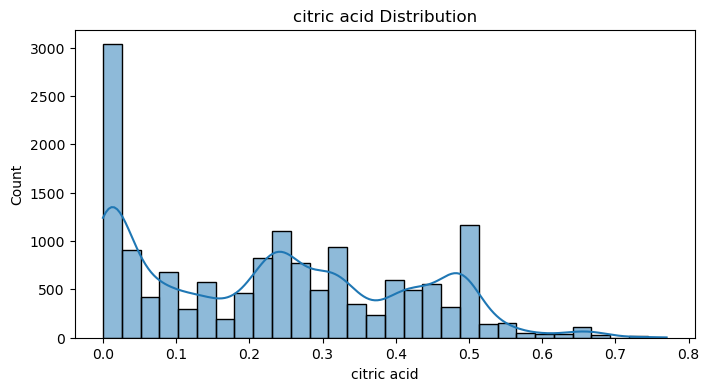

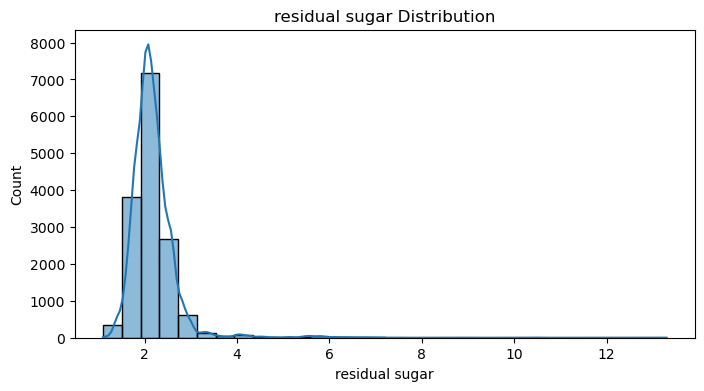

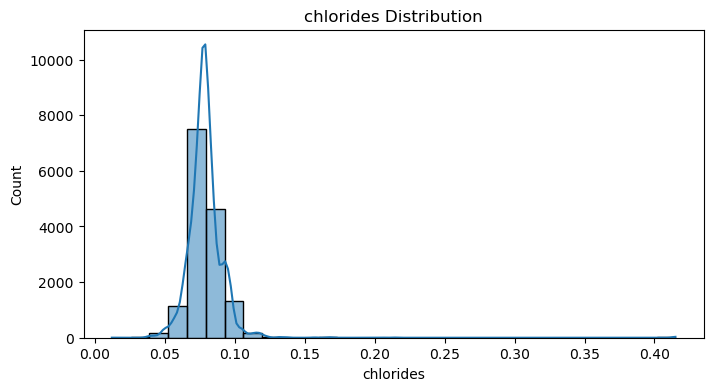

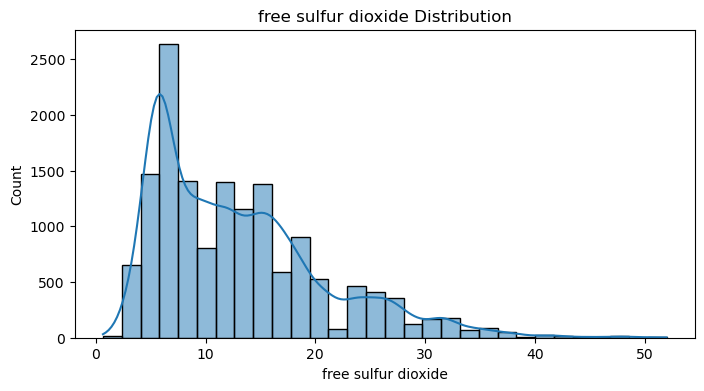

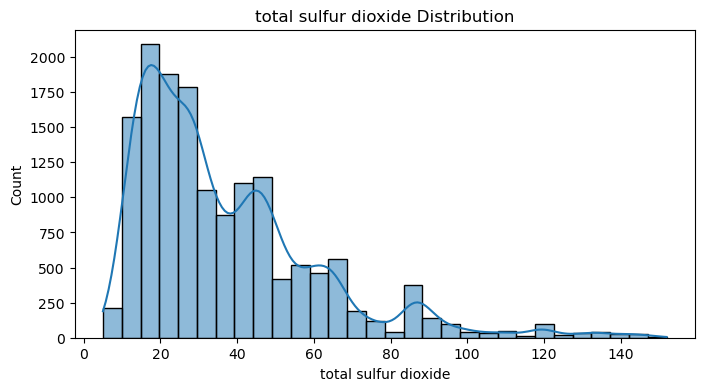

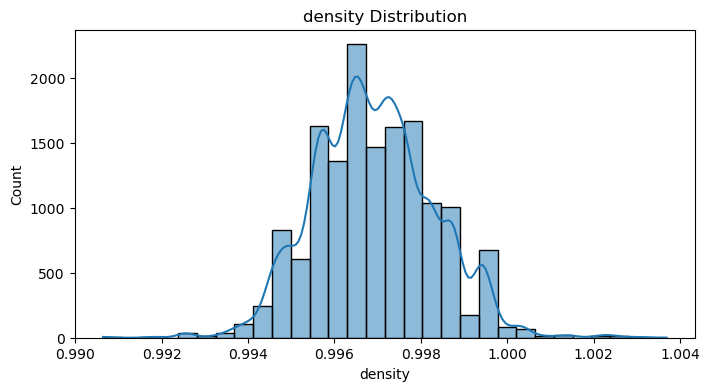

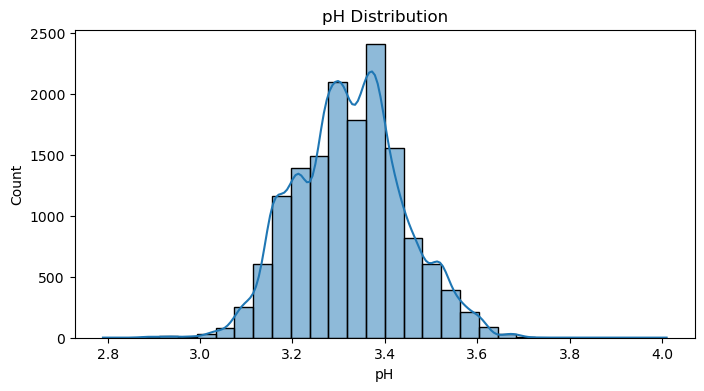

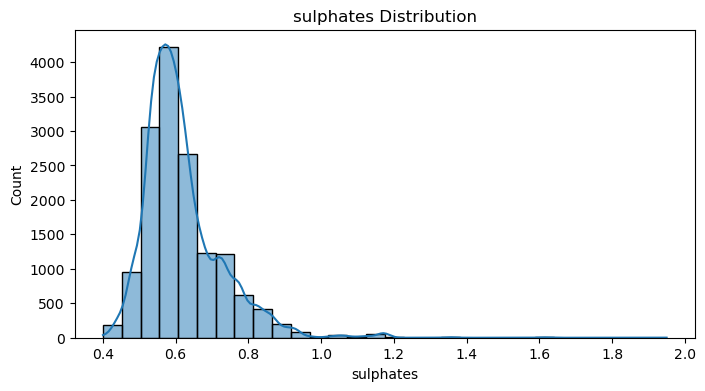

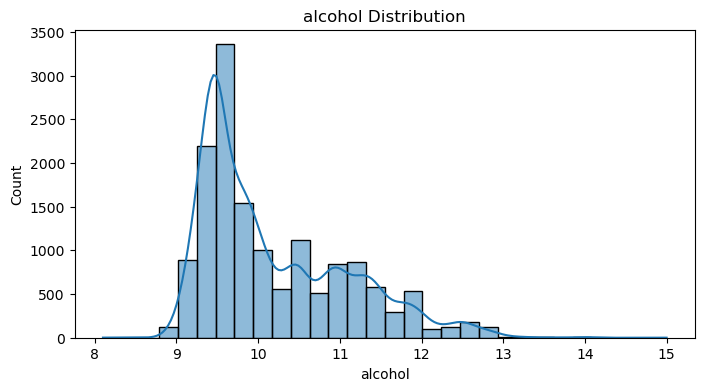

In [21]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.show()

<Axes: >

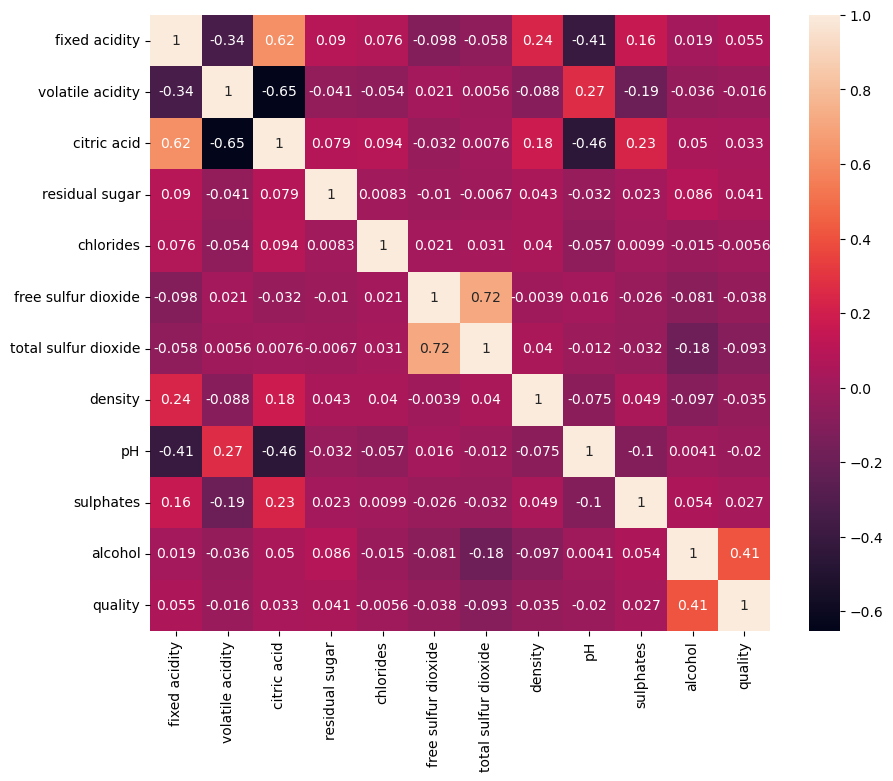

In [30]:
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

In [32]:
abs(train.corr(numeric_only=True)['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.409206
fixed acidity           0.055287
residual sugar          0.041071
citric acid             0.033279
sulphates               0.027000
chlorides               0.005636
id                      0.015182
volatile acidity        0.016020
pH                      0.019805
density                 0.034728
free sulfur dioxide     0.037644
total sulfur dioxide    0.093470
Name: quality, dtype: float64

## Modelling

In [36]:
from sklearn.model_selection import train_test_split

In [34]:
x = train.drop(columns=['quality'])
y = train[['quality']]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [40]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[   0    0   18    0    0    0]
 [   0    0   88    0    0    0]
 [   0    0 1225    0    0    0]
 [   0    0 1247    0    0    0]
 [   0    0  373    0    0    0]
 [   0    0   49    0    0    0]]
LogisticRegression()  modeli eğitiliyor!..
[[  0   0   8  10   0   0]
 [  0   0  46  42   0   0]
 [  0   0 726 499   0   0]
 [  0   0 636 611   0   0]
 [  0   0 157 216   0   0]
 [  0   0  19  30   0   0]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[  1   1   4   8   4   0]
 [  0   4  38  32  14   0]
 [  7  50 580 469 104  15]
 [  7  55 469 521 170  25]
 [  2  10  79 166 111   5]
 [  0   1  16  24   7   1]]
RandomForestClassifier()  modeli eğitiliyor!..
[[  0   0   7   7   4   0]
 [  0   0  40  44   4   0]
 [  0   0 904 295  26   0]
 [  0   0 597 574  76   0]
 [  0   0  61 225  87   0]
 [  0   0  17  24   8   0]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[  0   0   9   7   2   0]
 [  0   0  42  41   5   0]
 

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.541000,0.541000,0.541000,0.541000
AdaBoostClassifier,0.527667,0.527667,0.527667,0.527667
RandomForestClassifier,0.521667,0.521667,0.521667,0.521667
LogisticRegression,0.445667,0.445667,0.445667,0.445667
BernoulliNB,0.408333,0.408333,0.408333,0.408333
KNeighborsClassifier,0.407667,0.407667,0.407667,0.407667
DecisionTreeClassifier,0.406000,0.406000,0.406000,0.406000


In [41]:
features = [col for col in train.columns if col not in ['id', 'quality']]

In [46]:
x_train_full = train[features]
y_train_full = train['quality']

In [47]:
x_test = test[features]

In [48]:
best_model = GradientBoostingClassifier(random_state=42)

In [49]:
best_model.fit(x_train_full, y_train_full)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [50]:
test_predictions = best_model.predict(x_test)

In [51]:
submission = pd.DataFrame({
    'id': test['id'],
    'quality': test_predictions.astype(int)
})

In [52]:
submission.to_csv('submission.csv', index=False)

In [53]:
print(submission.head())

      id  quality
0  15000        5
1  15001        6
2  15002        5
3  15003        7
4  15004        6


## Conclusion

In this project, various classification models were evaluated to predict wine quality.

Among the tested algorithms, the **`GradientBoostingClassifier`** model yielded the best result with an **Accuracy score of approximately 54.1%**. Using this model, predictions were generated for the test set, and the `submission.csv` file was successfully created.